# Project 1 - Regression
## Forecasting the number of motor insurance claims
### This notebook uses the dateset *freMTPL2freq.csv*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)

For additional information on the dataset check https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3164764

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year. The insurance company wants to use this model to improve the policies' premiums (pricing).</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the insurance company reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the insurance company/project stakeholder.

## Initializations and data loading

In [1]:
"""
Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)

For additional information on the dataset check https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3164764

Work description
where you will assume the role of a consultant. 
You are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year.
The insurance company wants to use this model to improve the policies' premiums (pricing).
Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. 
Simultaneous, you should explain how your model can help the insurance company reaching its objectives.</p>

"""

"\n \n\n## Dataset description\n\n- **IDpol**: The policy ID (used to link with the claims dataset).\n- **ClaimNb**: Number of claims during the exposure period.\n- **Exposure**: The exposure period.\n- **Area**: The area code.\n- **VehPower**: The power of the car (ordered categorical).\n- **VehAge**: The vehicle age, in years.\n- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).\n- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.\n- **VehBrand**: The car brand (unknown categories).\n- **VehGas**: The car gas, Diesel or regular.\n- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.\n- **Region**: The policy regions in France (based on a standard French classification)\n\nFor additional information on the dataset check https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3164764\n\n## Work description\nwhere you will assume the role of a consultan

In [2]:
# Loading packages
import pandas as pd

In [51]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv("freMTPL2freq.csv", sep=";")
ds.describe(include='all').T

C:\Users\João Carlos Fidalgo\AppData\Local\Temp\ipykernel_33900\3374236374.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv("freMTPL2freq.csv", sep=";")


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDpol,678013,678013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNb,678013.0,NaN,NaN,NaN,0.053247,0.240117,0.0,0.0,0.0,0.0,16.0
Exposure,678013.0,NaN,NaN,NaN,0.52875,0.364442,0.002732,0.18,0.49,0.99,2.01
VehPower,678013.0,NaN,NaN,NaN,6.454631,2.050906,4.0,5.0,6.0,7.0,15.0
VehAge,678013.0,NaN,NaN,NaN,7.044265,5.666232,0.0,2.0,6.0,11.0,100.0
DrivAge,678013.0,NaN,NaN,NaN,45.499122,14.137444,18.0,34.0,44.0,55.0,100.0
BonusMalus,678013.0,NaN,NaN,NaN,59.761502,15.636658,50.0,50.0,50.0,64.0,230.0
Density,678013.0,NaN,NaN,NaN,1792.422405,3958.646564,1.0,92.0,393.0,1658.0,27000.0
Region,678013,22,R24,160601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,678013,6,C,191880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Show top rows
ds.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,Area,VehBrand,VehGas
0,1,1,0.10,5,0,55,50,1217,R82,D,B12,Regular
1,3,1,0.77,5,0,55,50,1217,R82,D,B12,Regular
2,5,1,0.75,6,2,52,50,54,R22,B,B12,Diesel
3,10,1,0.09,7,0,46,50,76,R72,B,B12,Diesel
4,11,1,0.84,7,0,46,50,76,R72,B,B12,Diesel


Importing packages

In [78]:
## develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year.
# Importing packages
from traceback import print_tb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Splitting the dataset into the Training set and Test set
#  area, vehbrand , vehgas, region are string values
ds['Area'] = ds['Area'].astype(str)
ds['VehBrand'] = ds['VehBrand'].astype(str)
ds['VehGas'] = ds['VehGas'].astype(str)
ds['Region'] = ds['Region'].astype(str)

# data preparation for the model: 
# #reshape the dataset to be used in the model.
X = ds.iloc[:, 1:8].values
y = ds.iloc[:, 1].values

print(X)
print(y)

[[1.000000e+00 1.000000e-01 5.000000e+00 ... 5.500000e+01 5.000000e+01
  1.217000e+03]
 [1.000000e+00 7.700000e-01 5.000000e+00 ... 5.500000e+01 5.000000e+01
  1.217000e+03]
 [1.000000e+00 7.500000e-01 6.000000e+00 ... 5.200000e+01 5.000000e+01
  5.400000e+01]
 ...
 [0.000000e+00 2.739726e-03 6.000000e+00 ... 4.500000e+01 5.000000e+01
  1.323000e+03]
 [0.000000e+00 2.739726e-03 4.000000e+00 ... 6.000000e+01 5.000000e+01
  9.500000e+01]
 [0.000000e+00 2.739726e-03 7.000000e+00 ... 2.900000e+01 5.400000e+01
  6.500000e+01]]
[1 1 1 ... 0 0 0]


Scaling

In [84]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()

#fit_transform() method is used to fit the scaler to the training data and then transform it.
X_train = sc.fit_transform(X_train)
#transform() method is used to transform the test data.
X_test = sc.transform(X_test)





StandardScaler()
StandardScaler()


Linear Regression 

Mean squared error: 0.00
Coefficient of determination: 1.00


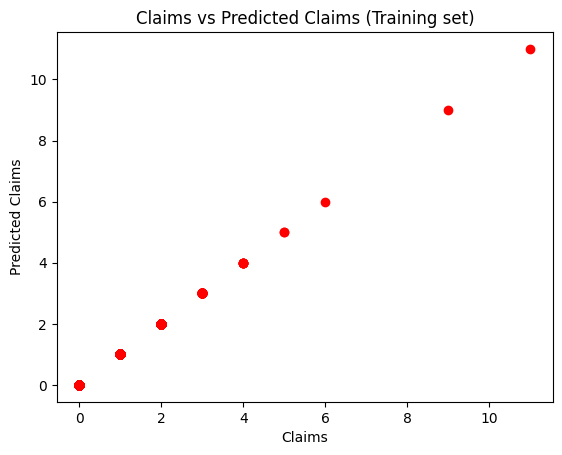

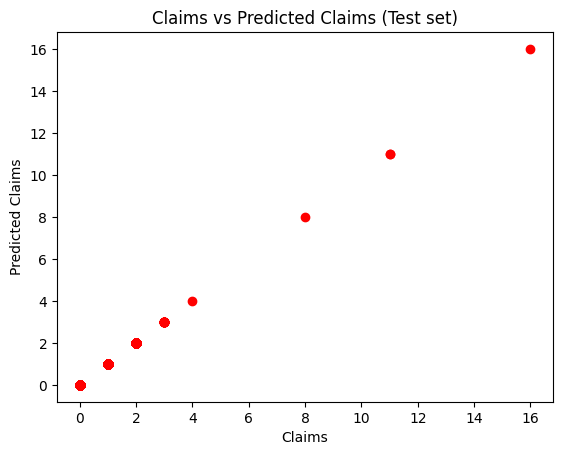

In [75]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Model Performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualising the Training set results
plt.scatter(y_train, regressor.predict(X_train), color = 'red')
plt.title('Claims vs Predicted Claims (Training set)')
plt.xlabel('Claims')
plt.ylabel('Predicted Claims')
plt.show()

# Visualising the Test set results
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Claims vs Predicted Claims (Test set)')
plt.xlabel('Claims')
plt.ylabel('Predicted Claims')
plt.show()

Polynomial Regression

Mean squared error: 0.00
Coefficient of determination: 1.00


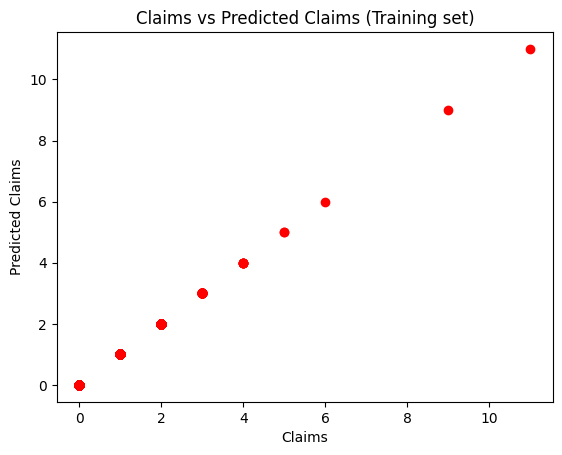

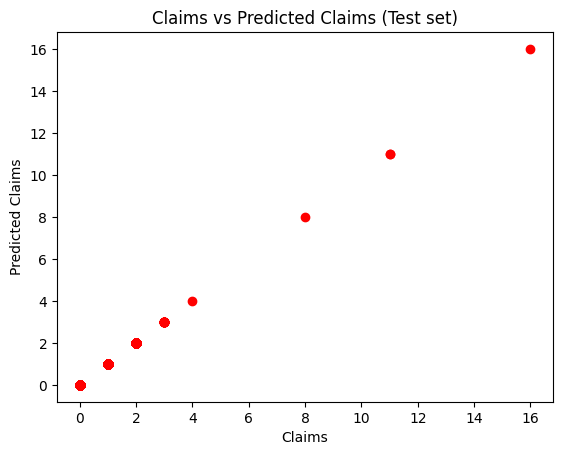

In [77]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 4) # degree = 4 is the best degree for the model because it has the lowest MSE and highest R2 score 
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Predicting a new result with Polynomial Regression
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

# Evaluating the Model Performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualising the Training set results
plt.scatter(y_train, lin_reg_2.predict(poly_reg.fit_transform(X_train)), color = 'red')
plt.title('Claims vs Predicted Claims (Training set)')
plt.xlabel('Claims')
plt.ylabel('Predicted Claims')
plt.show()

# Visualising the Test set results
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Claims vs Predicted Claims (Test set)')
plt.xlabel('Claims')
plt.ylabel('Predicted Claims')
plt.show()


In [ ]:

# Fitting Ridge Regression to the dataset
ridge_reg = Ridge(alpha=0.5, normalize=True)
ridge_reg.fit(X_train, y_train)

# Predicting a new result with Ridge Regression
y_pred = ridge_reg.predict(X_test)

# Evaluating the Model Performance
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualising the Training set results
plt.scatter(y_train, ridge_reg.predict(X_train), color = 'red')
plt.title('Claims vs Predicted Claims (Training set)')
plt.xlabel('Claims')
plt.ylabel('Predicted Claims')
plt.show()


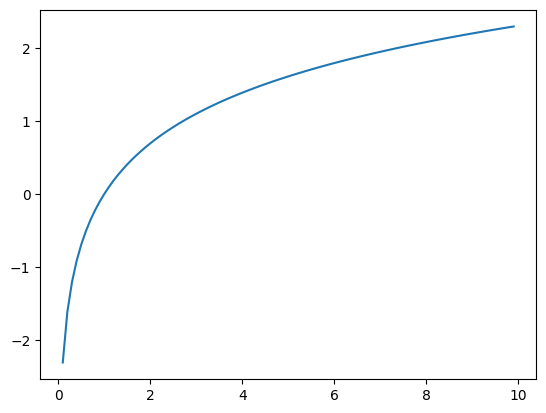

[-2.30258509 -1.60943791 -1.2039728  -0.91629073 -0.69314718 -0.51082562
 -0.35667494 -0.22314355 -0.10536052  0.          0.09531018  0.18232156
  0.26236426  0.33647224  0.40546511  0.47000363  0.53062825  0.58778666
  0.64185389  0.69314718  0.74193734  0.78845736  0.83290912  0.87546874
  0.91629073  0.95551145  0.99325177  1.02961942  1.06471074  1.09861229
  1.13140211  1.16315081  1.19392247  1.22377543  1.25276297  1.28093385
  1.30833282  1.33500107  1.36097655  1.38629436  1.41098697  1.43508453
  1.45861502  1.48160454  1.5040774   1.5260563   1.54756251  1.56861592
  1.58923521  1.60943791  1.62924054  1.64865863  1.66770682  1.68639895
  1.70474809  1.7227666   1.74046617  1.75785792  1.77495235  1.79175947
  1.80828877  1.82454929  1.84054963  1.85629799  1.87180218  1.88706965
  1.90210753  1.91692261  1.93152141  1.94591015  1.96009478  1.97408103
  1.98787435  2.00148     2.01490302  2.02814825  2.04122033  2.05412373
  2.06686276  2.07944154  2.09186406  2.10413415  2